<a href="https://colab.research.google.com/github/Rubina-Fathima/Bike-Sharing-ML-Project-12-14-22/blob/main/Individual_collab_bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>
Project Type - Regression

Contribution - Team

Team Member 1 - Racky Kumar

Team Member 2 - Jayesh

Team Member 3 - Mangal lokhande

Team Member 4 - Rubina Fathima



GitHub Link - https://github.com/rackysingh/Bike-Sharing-Demand-Prediction
Problem Description
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:

    Date : year-month-day
    Rented Bike count - Count of bikes rented at each hour
    Hour - Hour of he day
    Temperature-Temperature in Celsius
    Humidity - %
    Windspeed - m/s
    Visibility - 10m
    Dew point temperature - Celsius
    Solar radiation - MJ/m2
    Rainfall - mm
    Snowfall - cm
    Seasons - Winter, Spring, Summer, Autumn
    Holiday - Holiday/No holiday
    Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# Loading Dataset and Importing Modules

In [38]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
#To measure each algorithms efficiency we need libraries as below.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')
#load the seol bike data set from drive
bike_df=pd.read_csv('/content/drive/MyDrive/Bike_Sharing_ML_Project/SeoulBikeData.csv',encoding ='latin')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mount the drive and import the datset

In [39]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [40]:
bike_df.shape

(8760, 14)

In [41]:
bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [42]:
bike_df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [43]:
bike_df=bike_df.drop(columns='Date',axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [44]:
bike_df.isnull()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False


# Checking the Null values

In [45]:
bike_df.isna().any()[lambda x:x ]

Series([], dtype: bool)

In [46]:
bike_df.columns[bike_df.isna().any()].tolist()

[]

In [47]:
bike_df.loc[:,bike_df.isna().any()]

""
0
1
2
3
4
...
8755
8756
8757
8758


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1387bf58e0>,
      dtype=object)

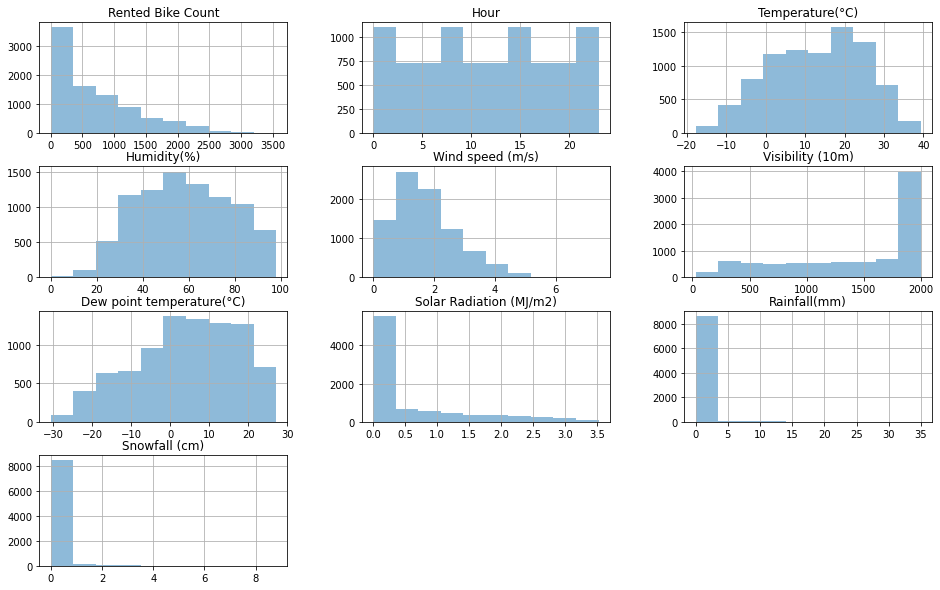

In [48]:
bike_df.hist(alpha=0.5,figsize=(16,10))

In [49]:
#IF the skewness is less that -1 and greater than 1 data is highly skewed apply transformations
bike_df.skew()

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
dtype: float64

In [50]:
crim_log=np.log(bike_df['Rainfall(mm)'])
crim_log.skew()
crim_snowfall_log=np.log(bike_df['Snowfall (cm)'])
crim_snowfall_log.skew()

nan

In [51]:
bike_df.skew()

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
dtype: float64

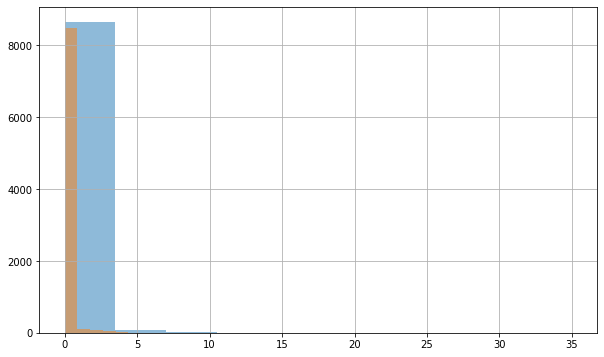

In [52]:
bike_df['Rainfall(mm)'].hist(alpha=0.5, figsize=(10,6))
bike_df['Snowfall (cm)'].hist(alpha=0.5, figsize=(10,6))

In [53]:
crim_sqrt=np.sqrt(bike_df['Rainfall(mm)'])
crim_sqrt.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Rainfall(mm), Length: 8760, dtype: float64>

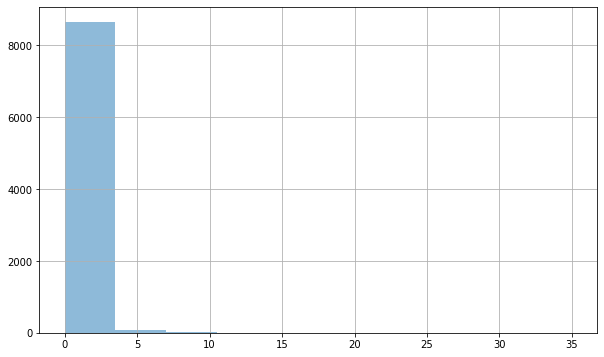

In [54]:
bike_df['Rainfall(mm)'].hist(alpha=0.5, figsize=(10,6))

In [55]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [56]:
#boxcox will not perform because data is negative
from scipy import stats
crim_box_cox=stats.boxcox(bike_df['Rainfall(mm)'])[0]
pd.Series(crim_box_cox).skew()

ValueError: ignored

In [ ]:
bike_df['Date']=bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
bike_df['Date']
bike_df['year']=bike_df['Date'].dt.year
bike_df['month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day_name()
bike_df.head()
bike_df['Day']=bike_df['Day'].apply(lambda x: 1 if x=='saturday' or x=='sunday' else 0)
bike_df=bike_df.drop(columns=['month'],axis=1,inplace=True)
#bike_df=bike_df.drop(columns=['year'],axis=1,inplace=True)
bike_df.head()

In [ ]:
#qauntiletransformer is applied to whole dataset where we have only numerical data.Our dataset has date as string format so it cannot be applied here.
from sklearn.preprocessing import QuantileTransformer
quantile=QuantileTransformer(output_distribution='normal')
data_trans=quantile.fit_transform(bike_df)
pyplot.hist(data_trans,bins=25)
pyplot.show()

# Object data types and encoding them.

In [ ]:
#code to fetch objet dtype columns
object_columns=bike_df.select_dtypes(include=['object']).copy()
object_columns.head()

In [ ]:
bike_df['Seasons'].unique()

In [58]:
cleanup_seasons={'Seasons':{'Winter':1,'Spring':2,'Summer':3,'Autumn':4}}
bike_df.replace(cleanup_seasons)
#checking unique values of holiday column to do encoding
bike_df['Holiday'].unique()
cleanup_holiday={'Holiday':{'No Holiday':1,'Holiday':0}}
bike_df.replace(cleanup_holiday)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,1,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,1,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,1,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,1,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,1,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,1,Yes


In [ ]:
#checking unique values of holiday column to do encoding
object_columns['Holiday'].unique()
cleanup_holiday={'Holiday':{'No Holiday':1,'Holiday':0}}
bike_df.replace(cleanup_holiday)

# Another way of encoding by cat.codes

In [61]:
bike_df['Holiday']=bike_df['Holiday'].astype('category')
bike_df.head()
bike_df.dtypes
bike_df['Holiday']=bike_df['Holiday'].cat.codes
bike_df.head()
bike_df['Seasons']=bike_df['Seasons'].astype('category')
bike_df['Seasons']=bike_df['Seasons'].cat.codes
bike_df['Functioning Day']=bike_df['Functioning Day'].astype('category')
bike_df['Functioning Day']=bike_df['Functioning Day'].cat.codes
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the data set in real life? Does a wagon have “4X” more weight in our calculation than the convertible? In this example, I don’t think so.

# Instead of Label encoding we can go with one hot encoding.
This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [ ]:
#pd.get_dummies(bike_df,columns=['Functioning Day']).head()
X=bike_df.drop(columns='Rented Bike Count',axis=1)
y=np.sqrt(bike_df['Rented Bike Count'])
X.head()

# Applying linear regression here itself

In [71]:
#pd.get_dummies(bike_df,columns=['Functioning Day']).head()
X=bike_df.drop(columns='Rented Bike Count',axis=1)
y=np.sqrt(bike_df['Rented Bike Count'])
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
#import the packages

from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)
bike_df.head()



(6570, 12)
(2190, 12)


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [69]:
#check the score
reg.score(X_train, y_train)

#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
y_pred_train
y_pred_test
#check the score
reg.score(X_train, y_train)#Return the coefficient of determination of the prediction 0.65 is the score on xtrain and ytrain data of the linear regression


0.6502683918833501

In [70]:

#here im performing the algorithm on train data set and finding the errors in trian data set 
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 53.85540773128225
RMSE : 7.338624375949641
MAE : 5.593260552365003
R2 : 0.6502683918833501
Adjusted R2 : 0.6483406108556056


Now Im perfoming algothims prediction on test dataset.

In [73]:
reg.score(X_test,y_test)

0.6571379347749965

In [72]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

MSE : 54.160687287046976
RMSE : 7.3593944918754675
MAE : 5.647883521870845


For instance, if we want to do the equivalent to label encoding, we need to instantiate a OrdinalEncoder object and fit_transform the data:

In [ ]:
#ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
ordinal_encoded_df=ordinal_encoder.fit_transform(bike_df[['Seasons']])
bike_df.head()

# binary encoding one hot encoding

In [ ]:
bike_df.head()

In [ ]:
#rom sklearn.preprocessing import OneHotEncoder
#one_hot_encoder=OneHotEncoder()
#oe_results=one_hot_encoder.fit_transform(bike_df[['Functioning Day']])
#bike_df=bike_df.join(pd.DataFrame(oe_results.toarray(),columns=one_hot_encoder.categories_))
#bike_df.head()

here oe_results gives elements in compressed sparse row format.
so use toarray() to convert results into dataframe


In [ ]:
#bike_df=bike_df.drop(columns='Date',axis=1,inplace=True)
bike_df.head()

# Checking multicollinearity

In [ ]:
#pd.get_dummies(bike_df,columns=['Functioning Day']).head()
cleanup_seasons={'Seasons':{'Winter':1,'Spring':2,'Summer':3,'Autumn':4}}
bike_df.replace(cleanup_seasons)
#checking unique values of holiday column to do encoding
cleanup_holiday={'Holiday':{'No Holiday':1,'Holiday':0}}
bike_df.replace(cleanup_holiday)
bike_df.head()